In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [209]:
X_train = np.linspace(1,2,num=10000).reshape(10000,1)
y_train = X_train + (X_train**2)*2 + (X_train**3)*3

X_validation = np.linspace(2,2.2,num=20).reshape(20,1)
y_validation = X_validation + (X_validation**2)*2 + (X_validation**3)*3

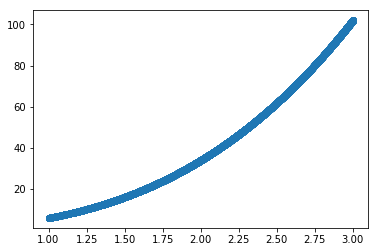

In [194]:
plt.plot(X_train,y_train,'o-')

In [14]:
def initialise_parameter(X):
    parameter = np.zeros((X.shape[1],1))
    return parameter

In [15]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [16]:
def costfunction(X,y,theta):
    m = X.shape[0]
    return (1 / (2 * m)) * np.dot((hypothesis(X,theta)-y).T , (hypothesis(X,theta)-y))[0,0]

In [65]:
def update_parameter(X,y,theta,alpha):
    m = X.shape[0]
    theta -= alpha * (1 / m) * np.dot( (hypothesis(X,theta)-y).T , X).T
    return theta

In [66]:
def reshapeInput(X,deg):
    X_mod = np.insert(X,0,1,axis=1)
    for p in range(2,deg+1):
        X_mod = np.insert(X_mod,X_mod.shape[1],X_mod[:,1]**p,axis=1)
    return X_mod

In [189]:
def modelNL(X,y,X_validation,y_validation,max_deg=5,alpha=0.0001,iteration=5000,print_details=False):
    parameters = dict()
    cost = []
    for deg in range(1,max_deg+1):
        X_mod = reshapeInput(X,deg)
        theta = initialise_parameter(X_mod)
        for _ in range(iteration):
            theta = update_parameter(X_mod,y,theta,alpha)
        parameters[str(deg)] = theta
        cost.append(costfunction(reshapeInput(X_validation,deg),y_validation,theta))
    return parameters,cost

In [219]:
para,cost = modelNL(X_train,y_train,X_validation,y_validation,max_deg=8)

In [220]:
para

{'1': array([[4.06974992],
        [7.07406205]]), '2': array([[1.52900046],
        [2.8396727 ],
        [5.23791225]]), '3': array([[0.59802283],
        [1.00805174],
        [1.73215497],
        [3.0253687 ]]), '4': array([[0.62785723],
        [0.79078945],
        [0.98383719],
        [1.18457911],
        [1.32459697]]), '5': array([[0.77325867],
        [0.93862322],
        [1.09598493],
        [1.17044769],
        [0.98376413],
        [0.13910545]]), '6': array([[ 0.68639677],
        [ 0.84957883],
        [ 1.02866106],
        [ 1.18259725],
        [ 1.20461829],
        [ 0.84568627],
        [-0.44281612]]), '7': array([[ 0.51652018],
        [ 0.62334469],
        [ 0.7446837 ],
        [ 0.86654654],
        [ 0.95168528],
        [ 0.91397863],
        [ 0.56751544],
        [-0.47357725]]), '8': array([[ 0.48703714],
        [ 0.55616259],
        [ 0.6243734 ],
        [ 0.6799749 ],
        [ 0.7025032 ],
        [ 0.65976121],
        [ 0.50762627],
       

In [221]:
cost

[200.36231304833274,
 34.454349183592136,
 0.05614422910924996,
 12.015215532222856,
 11.591438012154828,
 0.5765516945178354,
 29.672251963353393,
 73.91342542968258]

In [226]:
def plot_loss(i):
    plt.subplots(figsize=(18,6))
    plt.plot(X_validation,hypothesis(reshapeInput(X_validation,i) , para[str(i)]),'r--')
    plt.plot(X_validation,y_validation)
    plt.show()

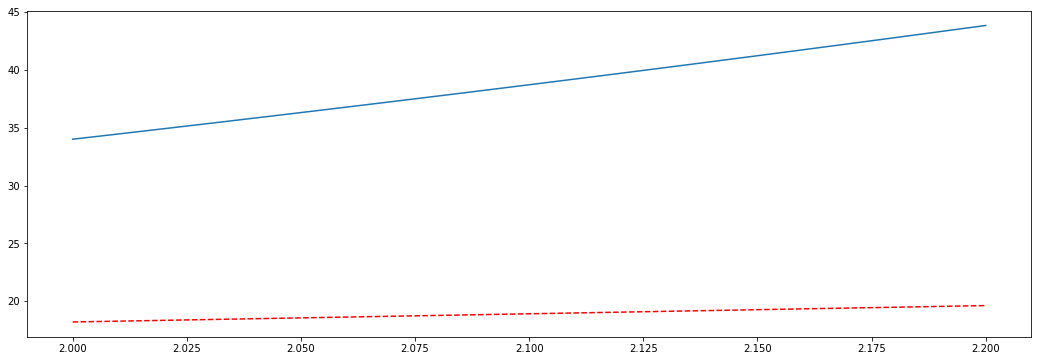

In [227]:
plot_loss(1)

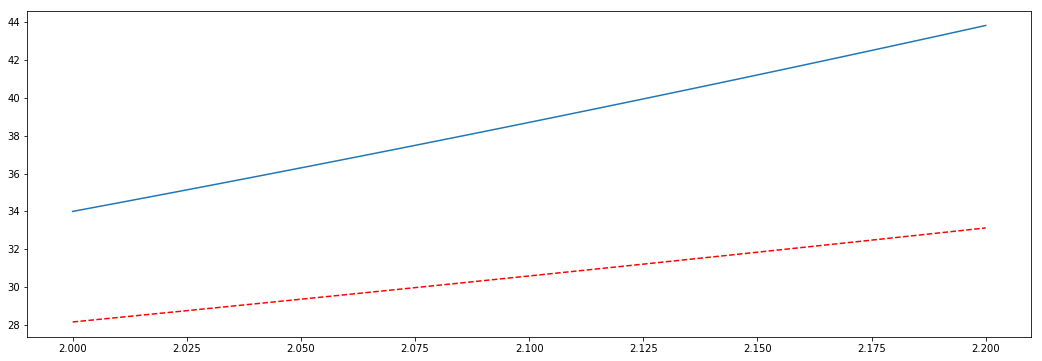

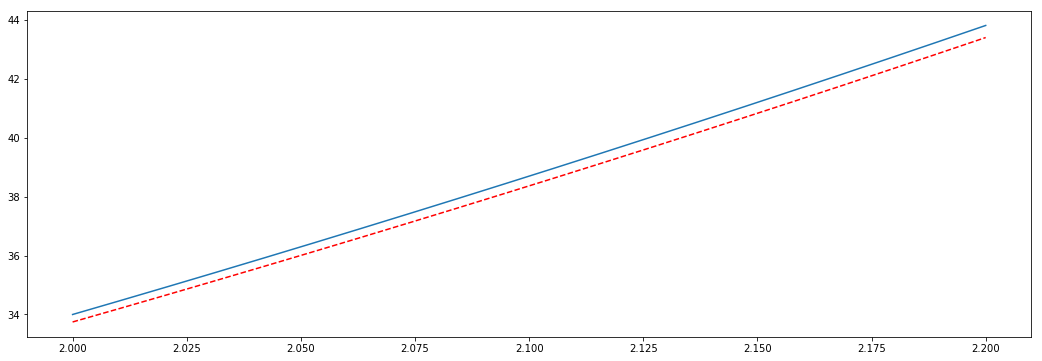

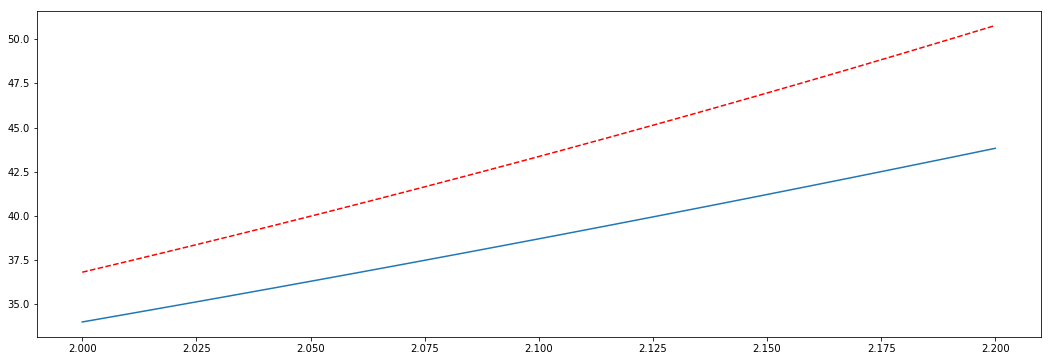

In [229]:
plot_loss(2)
plot_loss(3)
plot_loss(4)

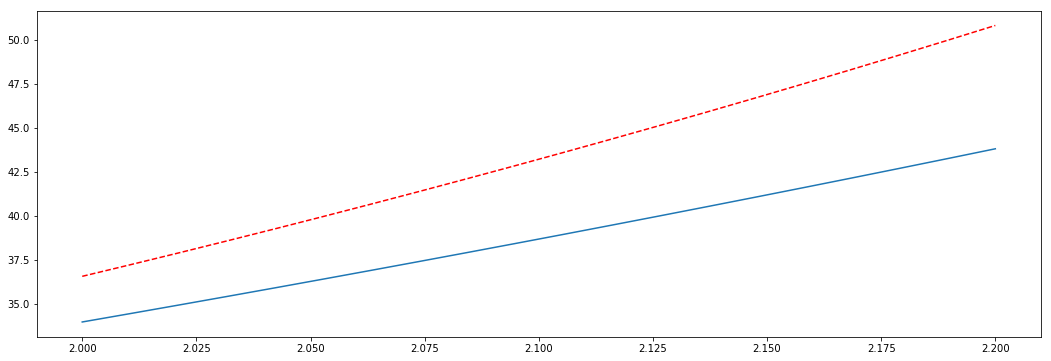

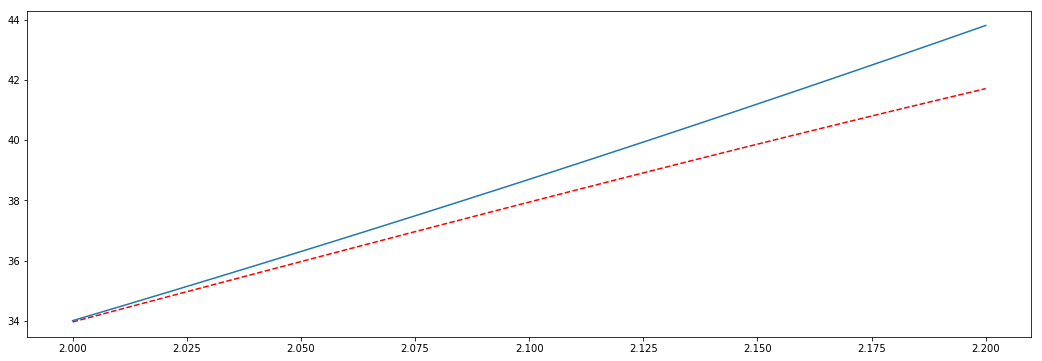

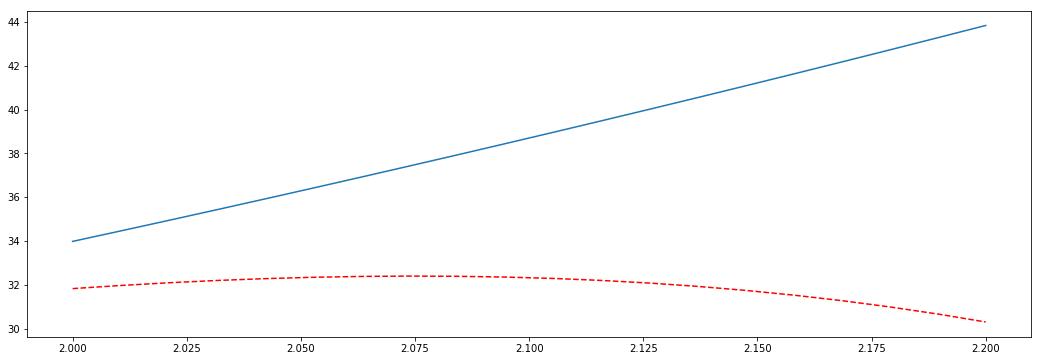

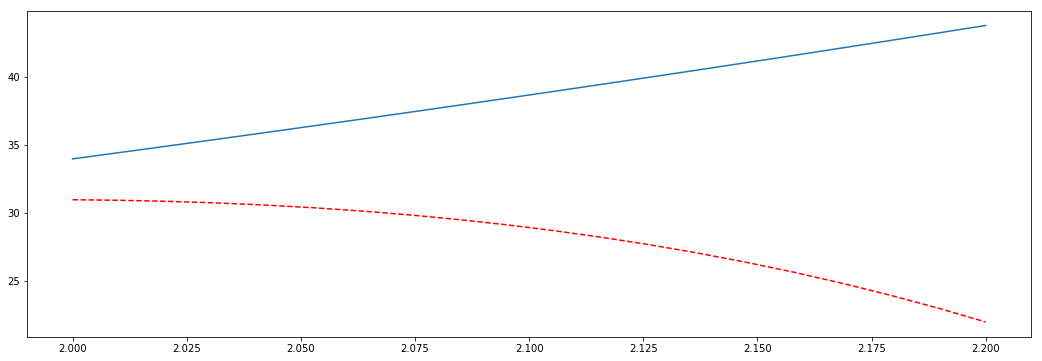

In [230]:
plot_loss(5)
plot_loss(6)
plot_loss(7)
plot_loss(8)

In [231]:
def plot_train(i):
    plt.subplots(figsize=(20,8))
    plt.plot(X_train,hypothesis(reshapeInput(X_train,i) , para[str(i)]),'r--')
    plt.plot(X_train,y_train)

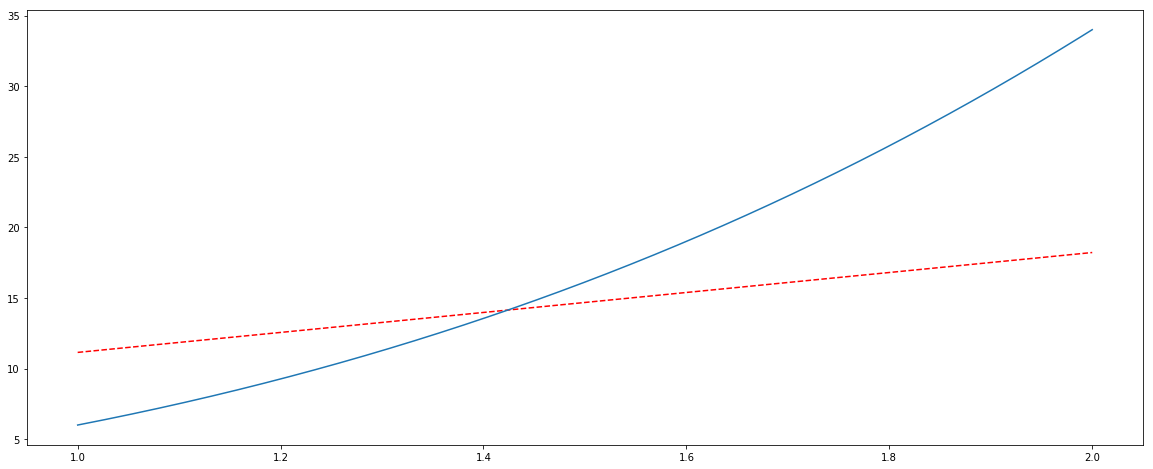

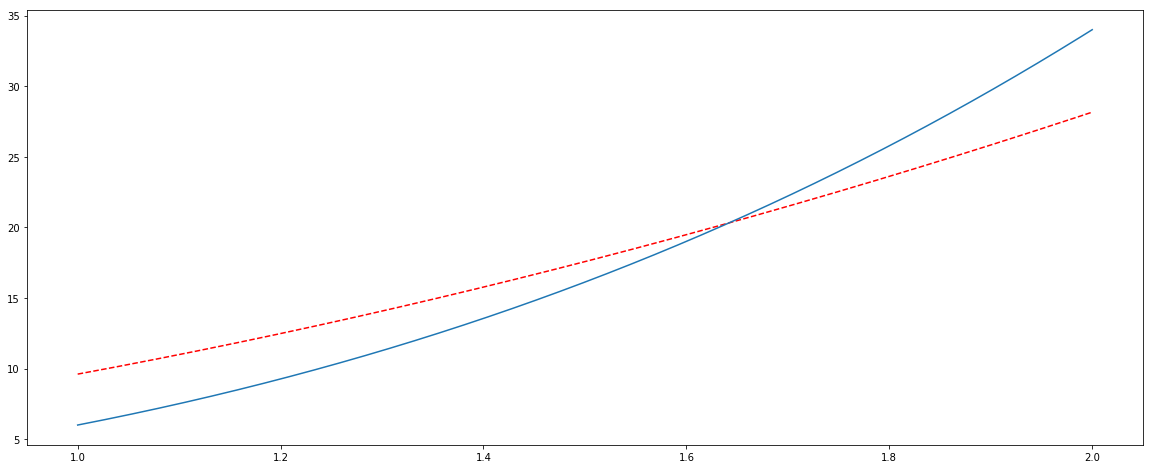

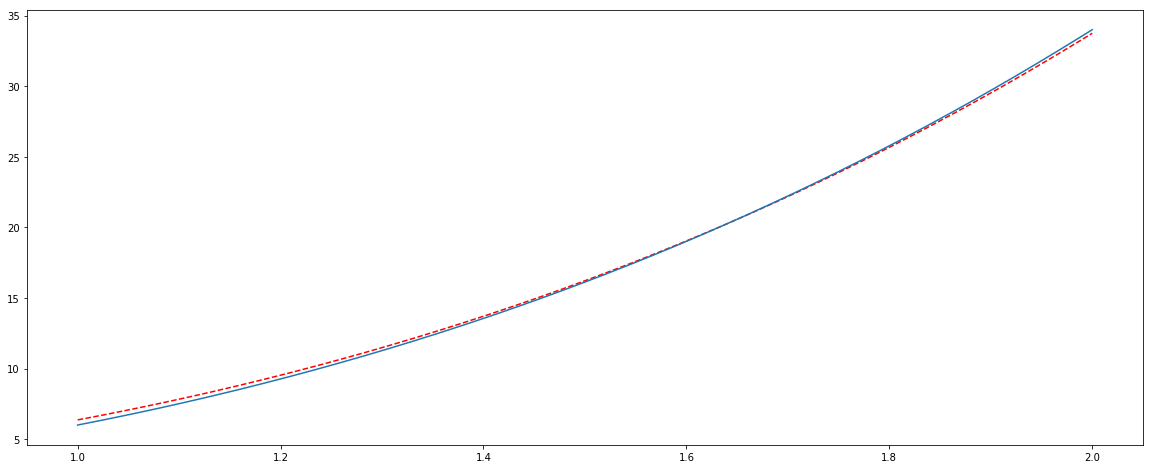

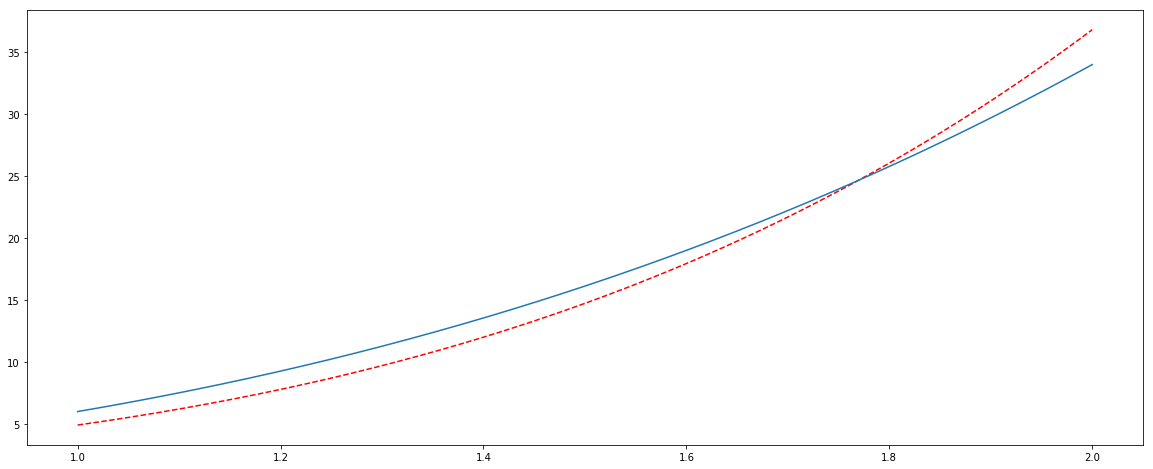

In [232]:
plot_train(1)
plot_train(2)
plot_train(3)
plot_train(4)

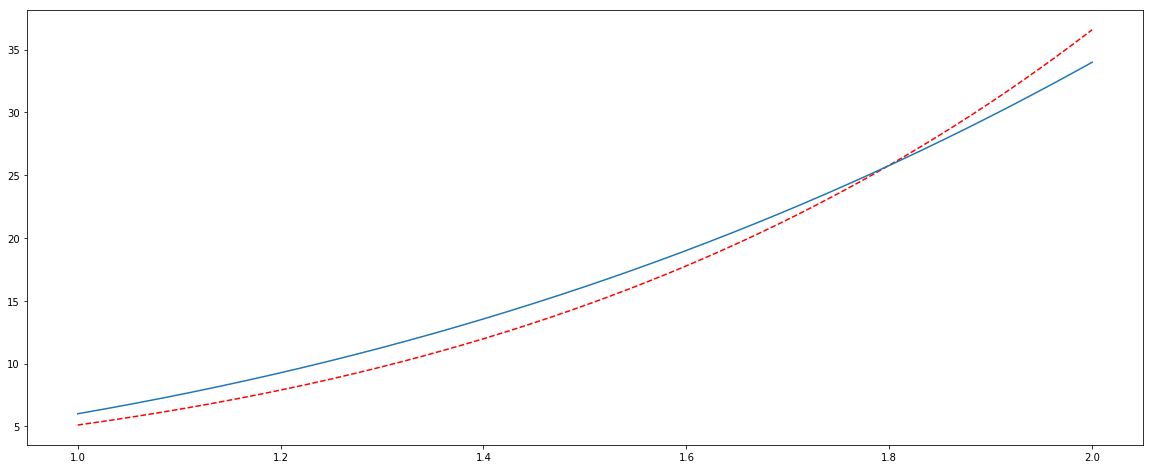

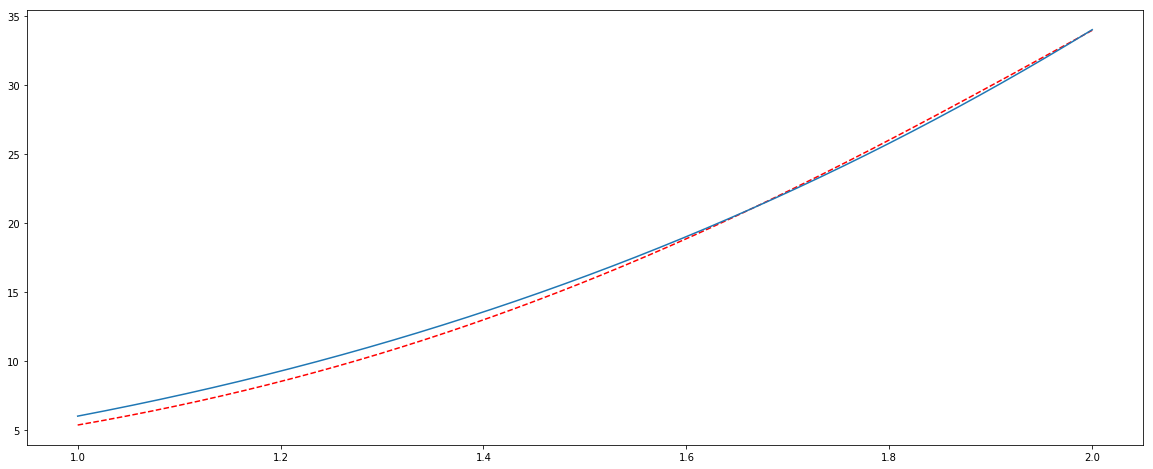

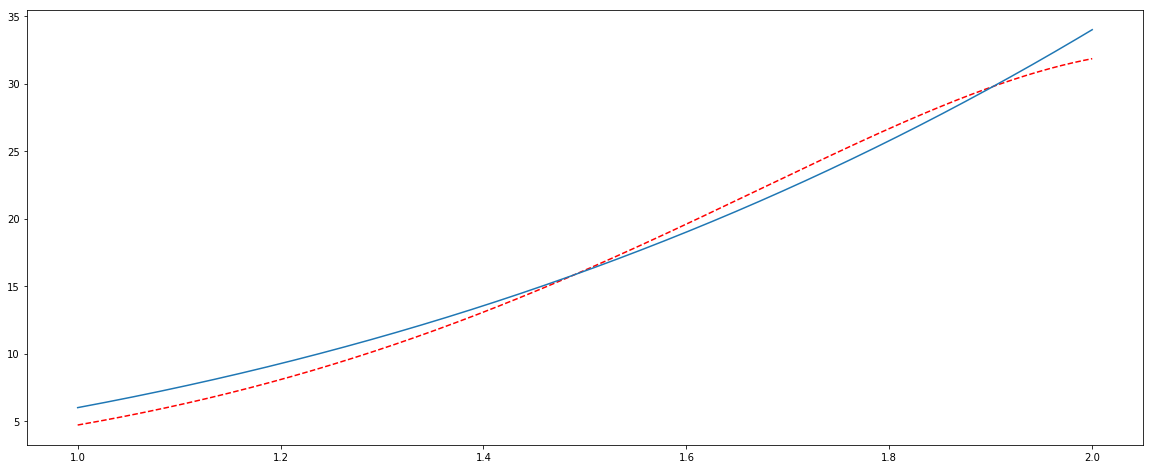

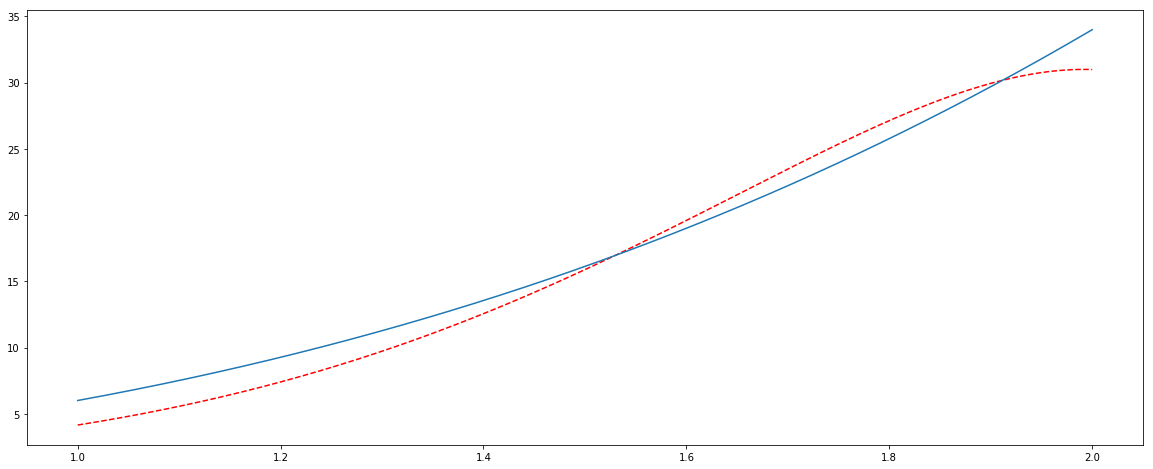

In [233]:
plot_train(5)
plot_train(6)
plot_train(7)
plot_train(8)